# 2. Model Building and Evaluation

### 0. Imports

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import cv2 as cv
from utils import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost

### 1. Load in Processed Images

In [3]:
cwd = os.getcwd()
data_path = os.path.join(cwd,'standardized_data/Training')

X = []
y = []

for label in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path,label)):
        image_path = os.path.join(data_path,label,image)
        load_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        # flatten_image = load_image.flatten()
        X.append(load_image)
        y.append(label)


# Convert to Numpy Array
X = np.array(X)
y = np.array(y)
le = LabelEncoder()
le.fit(y) 
y = le.transform(y)

print(X.shape)
print(y.shape)

print(X[0])
print(y[0])

(5712, 512, 512)
(5712,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3


### 2. Base Model (most common class classifier)

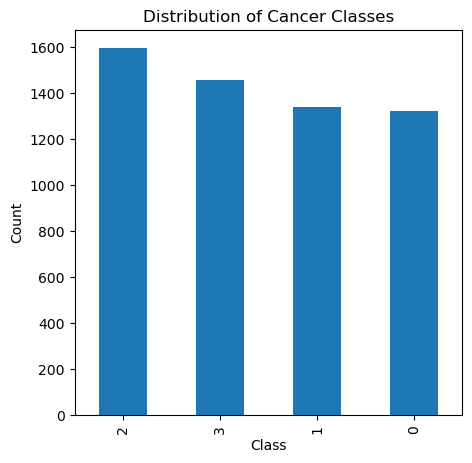

['glioma' 'meningioma' 'notumor' 'pituitary']


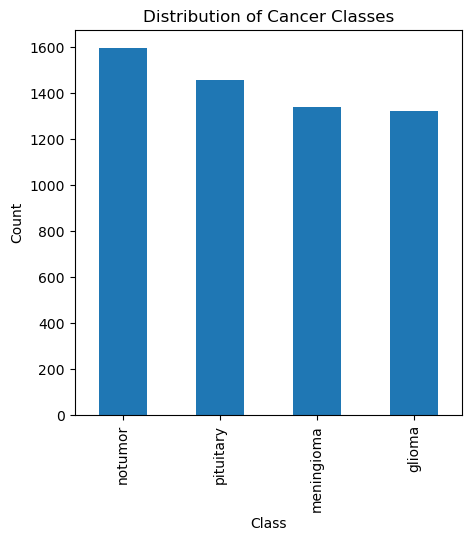

Most Common Label: 2
(5712,)
(5712,)


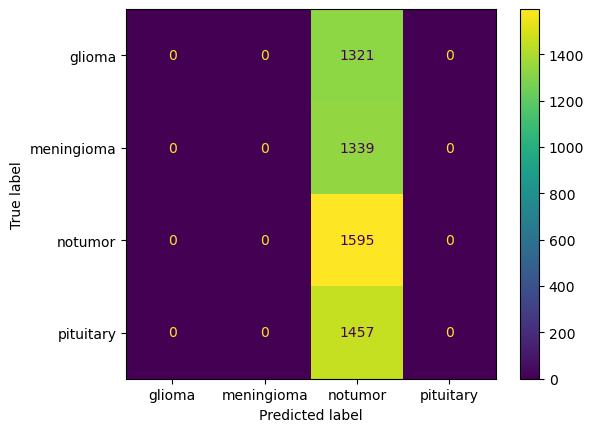

================== TRAINING METRICS ===================
Accuracy Score: 0.27923669467787116
Macro Precision: 0.06980917366946779
Macro Recall: 0.25
Macro F1: 0.10914191870808813
Micro Precision: 0.27923669467787116
Micro Recall: 0.27923669467787116
Micro F1: 0.27923669467787116


/Users/richardyan/miniforge3/envs/datasci281/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
plt.figure(figsize=(5,5))
y_train_series = pd.Series(y)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(le.classes_)
y_transformed = le.inverse_transform(y)

plt.figure(figsize=(5,5))
y_train_series = pd.Series(y_transformed)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Generate Model Statistics
most_common_label = stats.mode(y)[0]
print("Most Common Label: " + str(most_common_label))
y_predict = np.ones((y.shape)) * most_common_label
print(y_predict.shape)
print(y.shape)

# Generate Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot()
plt.show()

accuracy_score = metrics.accuracy_score(y, y_predict)
macro_precision = metrics.precision_score(y,y_predict,average ='macro')
macro_recall = metrics.recall_score(y,y_predict,average='macro')
macro_f1 = metrics.f1_score(y,y_predict,average='macro')
micro_precision = metrics.precision_score(y,y_predict,average='micro')
micro_recall = metrics.recall_score(y,y_predict,average='micro')
micro_f1 = metrics.f1_score(y,y_predict,average='micro')

print("================== TRAINING METRICS ===================")
print("Accuracy Score: " + str(accuracy_score))
print("Macro Precision: " + str(macro_precision))
print("Macro Recall: " + str(macro_recall))
print("Macro F1: " + str(macro_f1))
print("Micro Precision: " + str(micro_precision))
print("Micro Recall: " + str(micro_recall))
print("Micro F1: " + str(micro_f1))

### 3. Extract Features (Canny Edges, Difference of Gaussians, Complex Feature)

In [5]:
### TBD
X_dog_features = get_features(X, feat_name='blob_dog')
X_doh_features = get_features(X, feat_name='blob_doh')
X_canny_features = get_features(X, feat_name='canny')
pca = PCA(n_components=1000, svd_solver="randomized", whiten=True).fit(X_canny_features)
X_pca_canny_features = pca.transform(X_canny_features)
# X_complex_features = get_features(X, feat_name='complex')


Blob DoG Image:0
Blob DoG Image:1
Blob DoG Image:2
Blob DoG Image:3
Blob DoG Image:4
Blob DoG Image:5
Blob DoG Image:6
Blob DoG Image:7
Blob DoG Image:8
Blob DoG Image:9
Blob DoG Image:10
Blob DoG Image:11
Blob DoG Image:12
Blob DoG Image:13
Blob DoG Image:14
Blob DoG Image:15
Blob DoG Image:16
Blob DoG Image:17
Blob DoG Image:18
Blob DoG Image:19
Blob DoG Image:20
Blob DoG Image:21
Blob DoG Image:22
Blob DoG Image:23
Blob DoG Image:24
Blob DoG Image:25
Blob DoG Image:26
Blob DoG Image:27
Blob DoG Image:28
Blob DoG Image:29
Blob DoG Image:30
Blob DoG Image:31
Blob DoG Image:32
Blob DoG Image:33
Blob DoG Image:34
Blob DoG Image:35
Blob DoG Image:36
Blob DoG Image:37
Blob DoG Image:38
Blob DoG Image:39
Blob DoG Image:40
Blob DoG Image:41
Blob DoG Image:42
Blob DoG Image:43
Blob DoG Image:44
Blob DoG Image:45
Blob DoG Image:46
Blob DoG Image:47
Blob DoG Image:48
Blob DoG Image:49
Blob DoG Image:50
Blob DoG Image:51
Blob DoG Image:52
Blob DoG Image:53
Blob DoG Image:54
Blob DoG Image:55
Bl

In [ ]:
# print(X_dog_features.shape)
# print(X_doh_features.shape)
# print(X_canny_features.shape)
# np.save('X_dog_features.npy', X_dog_features)
# np.save('X_doh_features.npy', X_doh_features)
# np.save('X_pca_canny_features.npy', X_pca_canny_features)

(5712, 45)
(5712, 171)
(5712, 262144)


### 3a. PCA Variance Vectors

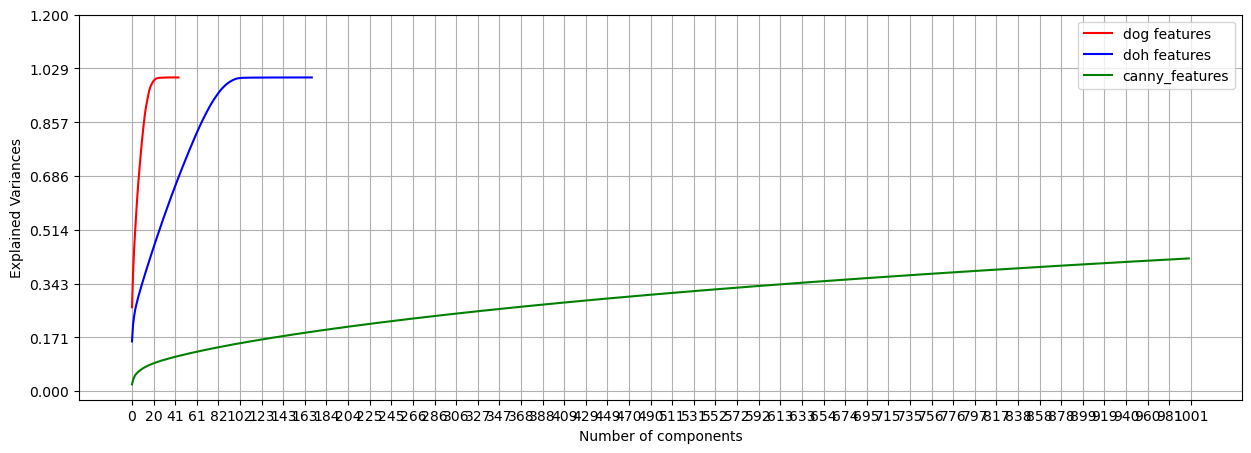

In [7]:
x = plot_PCA([X_dog_features, X_doh_features, X_canny_features], n_components=[min(X_dog_features.shape), min(X_doh_features.shape), 1000])


### 4. Shuffle Data

In [8]:
np.random.seed(281)

# Create a list of indexes that is the length of the number of training examples
indices = [i for i in range(0,X.shape[0])]
shuffle_indices = np.random.permutation(indices)

# Reorder X and Y based on the shuffled indices
# X = X[shuffle_indices]
# y = y[shuffle_indices]

X_dog_features = X_dog_features[shuffle_indices]
X_doh_features = X_doh_features[shuffle_indices]
X_canny_features = X_canny_features[shuffle_indices]
# X_complex_features = X_complex_features[shuffle_indices]

y = y[shuffle_indices]

### 5. Logistic Regression Model

In [9]:
# logistic_model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=100)
# logistic_model.fit(X,y)
# y_logistic_pred = logistic_model.predict(X)

In [10]:
# # Generate Confusion Matrix for Logistic Regression
# confusion_matrix = metrics.confusion_matrix(y, y_logistic_pred)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
# cm_display.plot()
# plt.show()

# accuracy_score = metrics.accuracy_score(y, y_logistic_pred)
# macro_precision = metrics.precision_score(y,y_logistic_pred,average ='macro')
# macro_recall = metrics.recall_score(y,y_logistic_pred,average='macro')
# macro_f1 = metrics.f1_score(y,y_logistic_pred,average='macro')
# micro_precision = metrics.precision_score(y,y_logistic_pred,average='micro')
# micro_recall = metrics.recall_score(y,y_logistic_pred,average='micro')
# micro_f1 = metrics.f1_score(y,y_logistic_pred,average='micro')

# print("================== TRAINING METRICS ===================")
# print("Accuracy Score: " + str(accuracy_score))
# print("Macro Precision: " + str(macro_precision))
# print("Macro Recall: " + str(macro_recall))
# print("Macro F1: " + str(macro_f1))
# print("Micro Precision: " + str(micro_precision))
# print("Micro Recall: " + str(micro_recall))
# print("Micro F1: " + str(micro_f1))

### 4. Build Support Vector Machine (this takes > 1 hour to run, will leave commented out for now)

In [11]:
# svm_param_grid = {
#     'C': [0.1,1,10,100],
#     'gamma': [0.0001,0.001,0.1,1],
#     'kernel': ['rbf','poly']
# }

# svc = svm.SVC(probability=True)
# model = GridSearchCV(svc, svm_param_grid, scoring='accuracy', cv=5)
# model.fit(X,y)

# print(model.best_params_)
# print(model.score(X,y))

### 5. Build Gradient Boosted Machine (training also takes > 1 hour)

In [12]:
# gbm_param_grid = {'loss':['log_loss'],
#                 'learning_rate':[0.1],
#                 'n_estimators':[80,100,120],
#                 'max_depth':[2,3,4]}

# gbm = GradientBoostingClassifier()
# gbm_model = GridSearchCV(gbm, gbm_param_grid, scoring='accuracy',cv=5)
# gbm_model.fit(X,y)
# print(str(gbm_model.best_params_))
# print(str(gbm_model.score(X,y)))

### 6. XGBoost Approach

### 7. Final Test Evaluation

In [13]:
# data_path_test = os.path.join(cwd,'data/Testing')

# X_test = []
# y_test = []

# for label in os.listdir(data_path_test):
#     for image in os.listdir(os.path.join(data_path_test,label)):
#         image_path = os.path.join(data_path_test,label,image)
#         load_image = preprocess_image(image_path)
#         flatten_image = load_image.flatten()
#         X_test.append(flatten_image)
#         y_test.append(label)


# # Convert to Numpy Array
# X_test = np.array(X_test)

# y_test = np.array(le.transform(y_test))

# y_test_base_model = np.ones((y_test.shape)) * most_common_label
# y_test_logistic = logistic_model.predict(X_test)

# # Generate Confusion Matrix for Base Model
# confusion_matrix = metrics.confusion_matrix(y_test, y_test_base_model)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
# cm_display.plot()
# plt.show()

# accuracy_score = metrics.accuracy_score(y_test, y_test_base_model)
# macro_precision = metrics.precision_score(y_test,y_test_base_model,average ='macro')
# macro_recall = metrics.recall_score(y_test,y_test_base_model,average='macro')
# macro_f1 = metrics.f1_score(y_test,y_test_base_model,average='macro')
# micro_precision = metrics.precision_score(y_test,y_test_base_model,average='micro')
# micro_recall = metrics.recall_score(y_test,y_test_base_model,average='micro')
# micro_f1 = metrics.f1_score(y_test,y_test_base_model,average='micro')

# print("================== TESTING METRICS BASE MODEL ===================")
# print("Accuracy Score: " + str(accuracy_score))
# print("Macro Precision: " + str(macro_precision))
# print("Macro Recall: " + str(macro_recall))
# print("Macro F1: " + str(macro_f1))
# print("Micro Precision: " + str(micro_precision))
# print("Micro Recall: " + str(micro_recall))
# print("Micro F1: " + str(micro_f1))

# # Generate Confusion Matrix for Base Model
# confusion_matrix = metrics.confusion_matrix(y_test, y_test_logistic)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
# cm_display.plot()
# plt.show()

# accuracy_score = metrics.accuracy_score(y_test, y_test_logistic)
# macro_precision = metrics.precision_score(y_test,y_test_logistic,average ='macro')
# macro_recall = metrics.recall_score(y_test,y_test_logistic,average='macro')
# macro_f1 = metrics.f1_score(y_test,y_test_logistic,average='macro')
# micro_precision = metrics.precision_score(y_test,y_test_logistic,average='micro')
# micro_recall = metrics.recall_score(y_test,y_test_logistic,average='micro')
# micro_f1 = metrics.f1_score(y_test,y_test_logistic,average='micro')

# print("================== TESTING METRICS LOGISTIC REGRESSION ===================")
# print("Accuracy Score: " + str(accuracy_score))
# print("Macro Precision: " + str(macro_precision))
# print("Macro Recall: " + str(macro_recall))
# print("Macro F1: " + str(macro_f1))
# print("Micro Precision: " + str(micro_precision))
# print("Micro Recall: " + str(micro_recall))
# print("Micro F1: " + str(micro_f1))